In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Label indices on DataFrames and Series

When we create a Pandas DataFrame or Series object there is always an associated "index" that labels the axes of the DataFrame or Series.  I'll refer to the values of these labels as "label indices" to disambiguate them from the standard positional indices that we're used to when working with Python data structures such as lists and arrays.

If you don't specify specific label indices, than Pandas will generate a default set of label indices for you:

In [2]:
df1 = pd.DataFrame({
 "chromosome": [1, 2, 3, 3],
 "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]   
})

df1

,chromosome,gene
0,1,YFG1
1,2,YFG2
2,3,YFG3
3,3,YFG4


In [3]:
df1.index  # get the label indices associated with the data frame

RangeIndex(start=0, stop=4, step=1)

A Slice generated by taking a single column of a DataFrame shares the same indices:

In [4]:
df1.gene

0    YFG1
1    YFG2
2    YFG3
3    YFG4
Name: gene, dtype: object

If you want to specify your own indices, use the `index` argument when constructing the data frame:

In [5]:
df1 = pd.DataFrame({
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]},
    index = ["a","b","c","d"])

df1

,chromosome,gene
a,1,YFG1
b,2,YFG2
c,3,YFG3
d,3,YFG4


The `loc` attribute of data frames allows us to index on subsets of the label indices.

In [6]:
df1.loc[["a","c","d"],:]

,chromosome,gene
a,1,YFG1
c,3,YFG3
d,3,YFG4


In [7]:
df1.gene 

a    YFG1
b    YFG2
c    YFG3
d    YFG4
Name: gene, dtype: object

### Label indices are not necessarily unique

In [8]:
df1a = pd.DataFrame({
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]},
    index = ["a","b","c","a"])

df1a

,chromosome,gene
a,1,YFG1
b,2,YFG2
c,3,YFG3
a,3,YFG4


In [9]:
df1a.loc["a",:]

,chromosome,gene
a,1,YFG1
a,3,YFG4


### Series and DataFrames may be multi-indexed

When using `groupby` with multiple variables, the returned Series is multi-indexed

In [10]:
df1aa = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"],
    "discoverer": ["Smith", "Doe", "Smith", "Martinez"]
    },
)
df1aa


,chromosome,gene,discoverer
0,1,YFG1,Smith
1,2,YFG2,Doe
2,3,YFG3,Smith
3,3,YFG4,Martinez


In [11]:
x = df1aa.groupby(["chromosome", "discoverer"]).gene.count()

In [12]:
x

chromosome  discoverer
1           Smith         1
2           Doe           1
3           Martinez      1
            Smith         1
Name: gene, dtype: int64

In [13]:
x.index  # Examine the index

MultiIndex([(1,    'Smith'),
            (2,      'Doe'),
            (3, 'Martinez'),
            (3,    'Smith')],
           names=['chromosome', 'discoverer'])

In [14]:
x.loc[(3, "Smith")]  # Access one element by a multi-indexed tuple

1

## Label indices are used when you combine information from different data frames

In [15]:
df1 = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]
    },
)

df2 = pd.DataFrame(
    {
    "gene": ["YFG4", "YFG2", "YFG3", "YFG1"],
    "description": ["Function X", "Function Y", "Function Z", ""],
    "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013"]
    },
)

In [16]:
df1 

,chromosome,gene
0,1,YFG1
1,2,YFG2
2,3,YFG3
3,3,YFG4


In [17]:
df2

,gene,description,reference
0,YFG4,Function X,Smith et al. 2010
1,YFG2,Function Y,Magwene 2020
2,YFG3,Function Z,Doe 1984
3,YFG1,,Botstein 2013


### What happens if we try and combine these data frames naively?

In [18]:
df1["description"] = df2.description  ## works but gives wrong alignment!
df1

,chromosome,gene,description
0,1,YFG1,Function X
1,2,YFG2,Function Y
2,3,YFG3,Function Z
3,3,YFG4,


In [19]:
# what happens if data frames have different indices?

df2alpha = pd.DataFrame({
 "gene": ["YFG4", "YFG2", "YFG3", "YFG1"],
 "description": ["Function X", "Function Y", "Function Z", ""],
 "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013"]
},
index=["a","b","c","d"])

df2alpha

,gene,description,reference
a,YFG4,Function X,Smith et al. 2010
b,YFG2,Function Y,Magwene 2020
c,YFG3,Function Z,Doe 1984
d,YFG1,,Botstein 2013


In [20]:
df1["description"] = df2alpha.description  ## works but gives empty values
df1

,chromosome,gene,description
0,1,YFG1,NaN
1,2,YFG2,NaN
2,3,YFG3,NaN
3,3,YFG4,NaN


### setting the index after creation

In [21]:
df1 = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]
    },
)

df2 = pd.DataFrame(
    {
    "gene": ["YFG4", "YFG2", "YFG3", "YFG1"],
    "description": ["Function X", "Function Y", "Function Z", ""],
    "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013"]
    },
)

In [22]:
df1 = df1.set_index(df1.gene)
df1

,chromosome,gene
gene,,
YFG1,1,YFG1
YFG2,2,YFG2
YFG3,3,YFG3
YFG4,3,YFG4


In [23]:
df2 = df2.set_index(df2.gene)
df2

,gene,description,reference
gene,,,
YFG4,YFG4,Function X,Smith et al. 2010
YFG2,YFG2,Function Y,Magwene 2020
YFG3,YFG3,Function Z,Doe 1984
YFG1,YFG1,,Botstein 2013


In [24]:
df1["description"] = df2["description"] # Now that df1 and df2 have the same index this works as expected!
df1

,chromosome,gene,description
gene,,,
YFG1,1,YFG1,
YFG2,2,YFG2,Function Y
YFG3,3,YFG3,Function Z
YFG4,3,YFG4,Function X


## Merging DataFrames

In [25]:
df1 = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4"]
    },
)

df2 = pd.DataFrame(
    {
    "gene": ["YFG4", "YFG2", "YFG3", "YFG1"],
    "description": ["Function X", "Function Y", "Function Z", ""],
    "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013"]
    },
)

In [26]:
df2

,gene,description,reference
0,YFG4,Function X,Smith et al. 2010
1,YFG2,Function Y,Magwene 2020
2,YFG3,Function Z,Doe 1984
3,YFG1,,Botstein 2013


In [27]:
pd.merge(df1, df2, on="gene")

,chromosome,gene,description,reference
0,1,YFG1,,Botstein 2013
1,2,YFG2,Function Y,Magwene 2020
2,3,YFG3,Function Z,Doe 1984
3,3,YFG4,Function X,Smith et al. 2010


### Other types of joins

In [28]:
df1 = pd.DataFrame(
    {
    "chromosome": [1, 2, 3, 3, 4],
    "gene": ["YFG1", "YFG2", "YFG3", "YFG4", "YFG5"],
    },
)


df2 = pd.DataFrame(
    {
    "gene": ["YFG4", "YFG2", "YFG3", "YFG1", "YFG9"],
    "description": ["Function X", "Function Y", "Function Z", "", "Function Q"],
    "reference": ["Smith et al. 2010", "Magwene 2020", "Doe 1984", "Botstein 2013", "Dietrich 2004"]
    },
)

In [29]:
df1

,chromosome,gene
0,1,YFG1
1,2,YFG2
2,3,YFG3
3,3,YFG4
4,4,YFG5


In [30]:
df2

,gene,description,reference
0,YFG4,Function X,Smith et al. 2010
1,YFG2,Function Y,Magwene 2020
2,YFG3,Function Z,Doe 1984
3,YFG1,,Botstein 2013
4,YFG9,Function Q,Dietrich 2004


In [31]:
pd.merge(df1,df2,on="gene")  # by default merge takes "inner" join = intersection of keys from left and right df

,chromosome,gene,description,reference
0,1,YFG1,,Botstein 2013
1,2,YFG2,Function Y,Magwene 2020
2,3,YFG3,Function Z,Doe 1984
3,3,YFG4,Function X,Smith et al. 2010


In [32]:
pd.merge(df1, df2, on="gene", how="left") # "left" join = keys from left df

,chromosome,gene,description,reference
0,1,YFG1,,Botstein 2013
1,2,YFG2,Function Y,Magwene 2020
2,3,YFG3,Function Z,Doe 1984
3,3,YFG4,Function X,Smith et al. 2010
4,4,YFG5,NaN,NaN


In [33]:
pd.merge(df1, df2, on="gene", how="right") # "right" join = keys from right df

,chromosome,gene,description,reference
0,3.0,YFG4,Function X,Smith et al. 2010
1,2.0,YFG2,Function Y,Magwene 2020
2,3.0,YFG3,Function Z,Doe 1984
3,1.0,YFG1,,Botstein 2013
4,NaN,YFG9,Function Q,Dietrich 2004


In [34]:
pd.merge(df1, df2, on="gene", how="outer")  # "outer" join = union of keys

,chromosome,gene,description,reference
0,1.0,YFG1,,Botstein 2013
1,2.0,YFG2,Function Y,Magwene 2020
2,3.0,YFG3,Function Z,Doe 1984
3,3.0,YFG4,Function X,Smith et al. 2010
4,4.0,YFG5,NaN,NaN
5,NaN,YFG9,Function Q,Dietrich 2004


## Combining information on genome features and gene ontology

In [35]:
yeast = pd.read_csv("/Users/pmagwene/Downloads/SGD_features.tsv", delimiter="\t")

In [36]:
yeast.columns

Index(['SGDID', 'Type', 'Qualifier', 'Name', 'Gene', 'Alias', 'Parent',
       'Secondary', 'Chromosome', 'Start', 'Stop', 'Strand', 'GeneticPosition',
       'CoordVersion', 'SeqVersion', 'Description'],
      dtype='object')

In [37]:
clens = pd.read_csv("/Users/pmagwene/Downloads/chromosome_length.tsv", delimiter="\t")

In [38]:
clens

,Chromosome,Systematic Name,Length
0,1,NC_001133,230218
1,2,NC_001134,813184
2,3,NC_001135,316620
3,4,NC_001136,1531933
4,5,NC_001137,576874
5,6,NC_001138,270161
6,7,NC_001139,1090940
7,8,NC_001140,562643
8,9,NC_001141,439888
9,10,NC_001142,745751


In [39]:
orfs = yeast[yeast.Type == "ORF"]

In [40]:
len(orfs)

6604

In [41]:
orfs.Chromosome.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '2',
       '2-micron', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [42]:
# filter out 2-micron and get counts of orfs by chromosome
orfcts = orfs[orfs.Chromosome != "2-micron"].Chromosome.value_counts()
orfcts

4     836
15    597
7     583
12    578
16    511
13    505
2     456
14    435
10    398
11    348
5     323
8     321
9     241
3     184
6     139
1     117
17     28
Name: Chromosome, dtype: int64

In [43]:
clens["NumGenes"] = orfcts  # this doesn't work as expected because indices are different types!

In [44]:
orfcts.index  # note that orfcts.index is of dtype=object

Index(['4', '15', '7', '12', '16', '13', '2', '14', '10', '11', '5', '8', '9',
       '3', '6', '1', '17'],
      dtype='object')

In [45]:
clens.index  # where clen index is the numbers in the range 0...17

RangeIndex(start=0, stop=17, step=1)

In [46]:
del clens["NumGenes"]  # delete the bad column we generated

The easiest solution to these problems is to turn our series into a DataFrame and given it a column filled with the integer values of the chromosomes.  After doing this we can use the `merge` functions as described above.

In [47]:
orfctsdf = pd.DataFrame({"NumGenes":orfcts,
                        "Chromosome":orfcts.index.astype("int")})
orfctsdf

,NumGenes,Chromosome
4,836,4
15,597,15
7,583,7
12,578,12
16,511,16
13,505,13
2,456,2
14,435,14
10,398,10
11,348,11


In [48]:
newClens = pd.merge(clens, orfctsdf, on="Chromosome")

In [49]:
newClens

,Chromosome,Systematic Name,Length,NumGenes
0,1,NC_001133,230218,117
1,2,NC_001134,813184,456
2,3,NC_001135,316620,184
3,4,NC_001136,1531933,836
4,5,NC_001137,576874,323
5,6,NC_001138,270161,139
6,7,NC_001139,1090940,583
7,8,NC_001140,562643,321
8,9,NC_001141,439888,241
9,10,NC_001142,745751,398


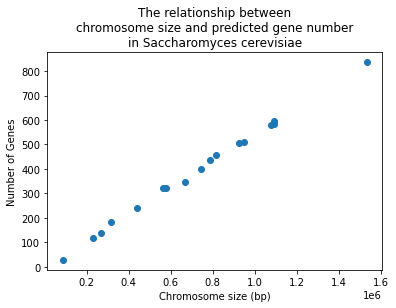

In [52]:
title = """The relationship between
chromosome size and predicted gene number
in Saccharomyces cerevisiae"""

plt.scatter(newClens.Length, newClens.NumGenes)
plt.xlabel("Chromosome size (bp)")
plt.ylabel("Number of Genes")
plt.title(title)
pass